<a href="https://colab.research.google.com/github/GamaLab42/Material_EQE_441/blob/main/M%C3%A9todo_anal%C3%ADtico_Equa%C3%A7%C3%A3o_de_Kremser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [13]:
# Bibliotecas usadas nas equações
import numpy as np  # Permite o uso de uma ampla variedades de operações matemáticas

# Biliotecas usadas para plotar as figuras
import matplotlib.pyplot as plt                           # Permite a geração de figuras de forma similar ao MATLAB
import matplotlib.ticker as mticker                       # Essa biblioteca auxilia na formatação das figuras

from ipywidgets import interact, interactive              # Função utilizada para permitir que a figura seja interativa
import ipywidgets as widgets
from ipywidgets import interactive, HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex




## Parâmetros

In [14]:
## Parâmetros iniciais

# @title Parâmetros iniciais do sistema: { display-mode: "form", run: "auto" }

# @markdown $x_i^{feed}$ (fração molar)
x_feed    = 0.1               # @param {type:"number"}

# @markdown $x_i^{ref}$ (fração molar)
x_ref     = 0.001             # @param {type:"number"}

# @markdown $m$ [-]
m         = 10                # @param {type:"number"}

# @markdown $F$ ($mol/h$)
F         = 10                # @param {type:"number"}

## Equação de Kremser

In [15]:
# @title Função para geração da figura: { display-mode: "form", run: "auto" }

def plot_fig(t,y,max_S):
  plt.plot(figsize=(13, 8))

  plt.plot(t, y)
  plt.ylim([0, 5])
  plt.xlim([0, max_S])
  plt.ylabel('n (nº de estágios)')
  plt.xlabel('S ($mol/h$)')
  plt.xticks(range(0, max_S, 10))
  plt.tight_layout() # Evita a sobreposições das figuras
  return plt.show()

Cálculo do estágio:

$n = \dfrac{\ln\left(\dfrac{x_i^{feed}}{x_{i,n}}(E-1)+1\right)}{\ln E}-1$

em que o fator de enriqueciomento é definido como:

$E = \dfrac{m}{{F}/{S}}$

In [16]:
def solve_Kremser(x_feed = x_feed, x_ref = x_ref, m = m, F = F, max_S = 60):

    S = np.linspace(1E-8, max_S, int(10*max_S))

    E = m*S/F

    # Pode ser que um dos valores de "n" seja um NaN (not a number)
    #  Isso ocorre pela divisão/logarítimos de zero
    #  A nível didático iremos ignorar esse erro. A função abaixo permite que
    #   o python não nos avise desse erro conhecido em cada compilação.
    with np.errstate(invalid='ignore'):
      n = np.log(x_feed/x_ref*(E-1)+1)/np.log(E) - 1

    # Retirar os pontos NaN na "força bruta" para o plot
    if np.isnan(n).any():
      max_val = np.nanmax(n)  # Determina o maior valor de n dentro do array
      n = np.where(np.isnan(n), max_val, n)  # Substitui NaN pelo valor encontrado

    plot_fig(S,n,max_S)

    return S, n

In [17]:
# @title Criando uma figura interativa: { display-mode: "form", run: "auto" }

# O código abaixo serve para personalizar a figura
x_feed_slider = widgets.FloatSlider(value=0.01, min=0.001, max=0.6, step=0.01, description='x_feed', readout_format='.2e')
x_ref_slider = widgets.FloatSlider(value=0.001, min=0.0001, max=0.01, step=0.001, description='x_ref', readout_format='.2e')
m_slider = widgets.IntSlider(value=5, min=2, max=20, step=1, description='m')
F_slider = widgets.IntSlider(value=5, min=2, max=20, step=1, description='F')
max_S_slider = widgets.IntSlider(value=60, min=10, max=180, step=10, description='max_S')

# Criando o widget interativo
w = interactive(solve_Kremser,
                x_feed=x_feed_slider,
                x_ref=x_ref_slider,
                m=m_slider,
                F=F_slider,
                max_S=max_S_slider)

display(w)


interactive(children=(FloatSlider(value=0.01, description='x_feed', max=0.6, min=0.001, readout_format='.2e', …

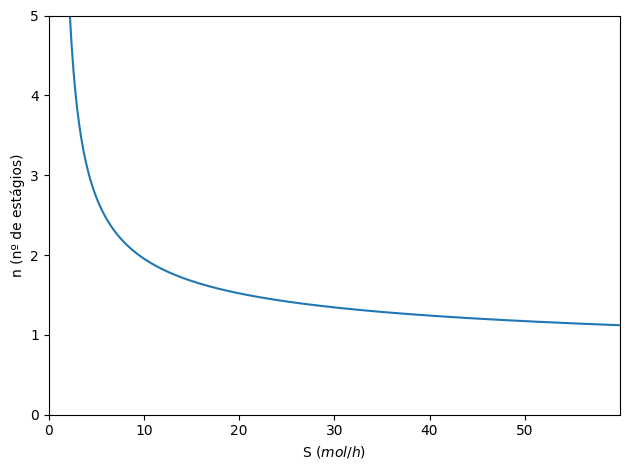

In [18]:
# @title Figura estática: { display-mode: "form", run: "auto" }

S, n = solve_Kremser(x_feed = x_feed, x_ref = x_ref, m = m, F = F, max_S = 60)
